In [ ]:
import numpy as np
import pandas as pd


In [ ]:
df=pd.read_csv('/content/Mall_Customers.csv')

Displaying of top 5 rows of the dataset

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Finding the shape of the dataset(no.of rows and no.of columns)

In [ ]:
df.shape

(200, 5)

Viewing the columns

In [ ]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

#CustomerID : A unique identifier assigned to each customer.
#Gender :The gender of the customer (e.g., Male or Female).
#Age : The age of the customer in years.
#Annual Income :The annual income of the customer in thousands of dollars.
#Spending Score (1-100):A score assigned to the customer based on their spending behavior and purchasing habits, where 1 indicates the lowest spending and 100 the highest.

Getting information about the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Checking the null values

In [ ]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


conclusion:There is no null values in the dataset

Checking the data types

In [ ]:
df.dtypes

,0
CustomerID,int64
Gender,object
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64


Converting object datatype into category

In [ ]:
df['Gender']=df['Gender'].astype('category')

Overall statistics about the dataset

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Kmeans Clustering

In [ ]:
X=df[['Annual Income (k$)','Spending Score (1-100)']]

In [ ]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
K_means=KMeans()
K_means.fit(X)

KMeans()

In [ ]:
K_means=KMeans(n_clusters=5)
K_means.fit_predict(X)#create dependent variable

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2,
       3, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0], dtype=int32)

Elbow method to find optimal no.of clusters

In [ ]:
wcss = []
for i in range(1,11):
  K_means=KMeans(n_clusters=i)
  K_means.fit(X)
  wcss.append(K_means.inertia_) #inertia=calculated within clusters sum ofsquares metrics

In [ ]:
wcss

[269981.28000000014,
 183499.07470288622,
 106348.37306211119,
 73880.64496247198,
 44454.47647967972,
 38813.772331834836,
 31573.96066412273,
 25095.703209997544,
 27268.96571916646,
 19664.68519600554]

In [ ]:
import matplotlib.pyplot as plt

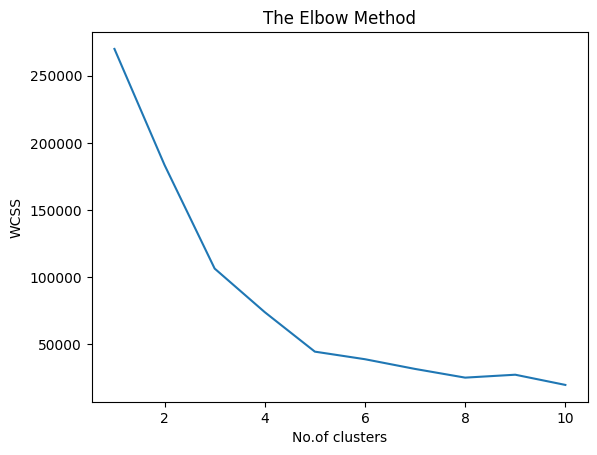

In [ ]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('No.of clusters')
plt.ylabel('WCSS')
plt.show()

Conclusion:The optimal no.of clusters are five because the graph decreasing strongly upto 5.

**Model Training**

In [ ]:
X=df[['Annual Income (k$)','Spending Score (1-100)']]

In [ ]:
K_means=KMeans(n_clusters=5,random_state=42)
y_means=K_means.fit_predict(X)

In [ ]:
y_means

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

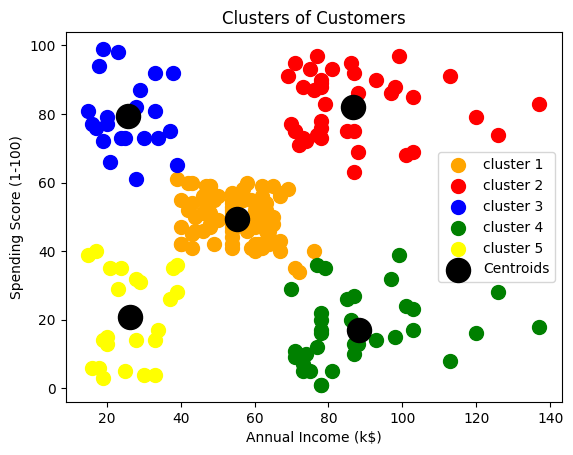

In [ ]:
plt.scatter(X.iloc[y_means==0,0],X.iloc[y_means==0,1],s=100,c='orange',label='cluster 1')
plt.scatter(X.iloc[y_means==1,0],X.iloc[y_means==1,1],s=100,c='red',label='cluster 2')
plt.scatter(X.iloc[y_means==2,0],X.iloc[y_means==2,1],s=100,c='blue',label='cluster 3')
plt.scatter(X.iloc[y_means==3,0],X.iloc[y_means==3,1],s=100,c='green',label='cluster 4')
plt.scatter(X.iloc[y_means==4,0],X.iloc[y_means==4,1],s=100,c='yellow',label='cluster 5')
plt.scatter(K_means.cluster_centers_[:,0],K_means.cluster_centers_[:,1],s=300,c='black',label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [ ]:
K_means.predict([[20,35]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([4], dtype=int32)

Save the model

In [ ]:
import joblib

In [ ]:
joblib.dump(K_means,'customer_segmentation')

['customer_segmentation']

In [ ]:
model=joblib.load('customer_segmentation')

In [ ]:
model.predict([[20,35]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([4], dtype=int32)